In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
def conv_block(prefix, kernel_size):
    layers = [
            ('%s_conv%d_a' % (prefix, kernel_size), kernel_size, 1, 1),  
            ('%s_conv%d_b' % (prefix, kernel_size), kernel_size, 1, 1), 
            ('%s_pool2' % prefix, 2, 2, 1)
    ]
    return layers


def tcn01_bottleneck(prefix, kernel_size, n_blocks):
    layers = []
    for i in range(n_blocks):
        dilation = 2 ** i
        layers.append(
            ('%s_up%d_conv%d' % (prefix, i+1, kernel_size), kernel_size, 1, dilation)
        )
    return layers


def tcn02_bottleneck(prefix, kernel_size, n_blocks):
    layers = []
    for i in range(n_blocks):
        dilation = 2 ** i
        layers.append(
            ('%s_up%d_conv%d' % (prefix, i+1, kernel_size), kernel_size, 1, dilation)
        )
    for i in range(n_blocks-1):
        dilation = 2 ** (n_blocks - 2 - i)
        layers.append(
            ('%s_down%d_conv%d' % (prefix, i+1, kernel_size), kernel_size, 1, dilation)
        )
    return layers

# TCN

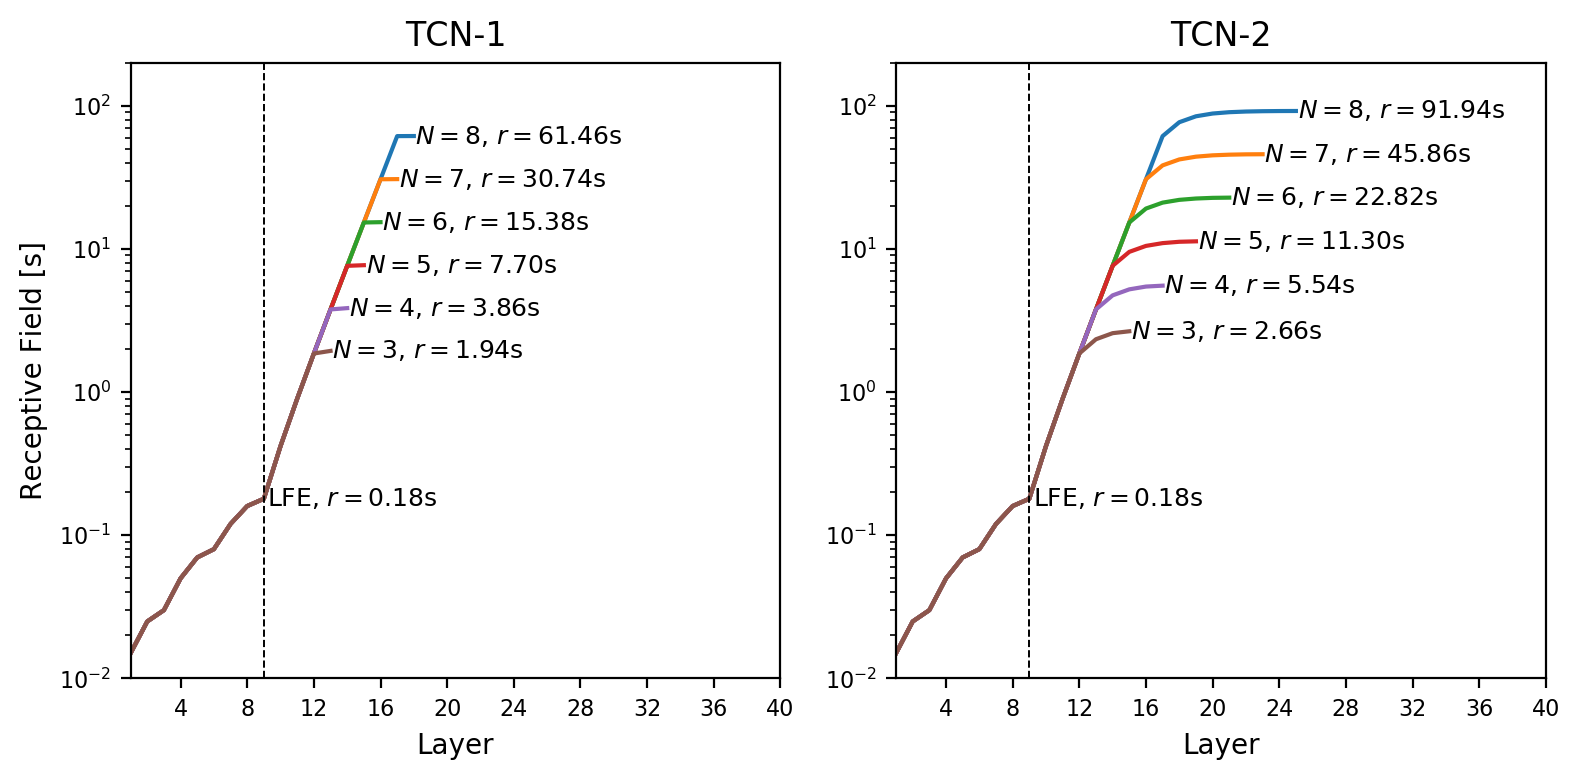

In [46]:
fs = 200
fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

ax = axes[0]
for n_blocks in range(8, 2, -1):
    layers = []
    layers.extend(conv_block('b1', 3))
    layers.extend(conv_block('b2', 3))
    layers.extend(conv_block('b3', 3))
    temp_feat_ext_idx = len(layers)
    layers.extend(tcn01_bottleneck('tcn01', 7, n_blocks))
    layers.extend([('last_conv3', 3, 1, 1)])
    n_layers = len(layers)
    r = 1
    acc_s = 1
    rep_fields = []
    for layer in layers:
        name, kernel_size, stride, dilation = layer
        r = (kernel_size - 1) * dilation * acc_s + r
        acc_s = acc_s * stride
        rep_fields.append(r / fs)
    ax.plot(range(1, n_layers+1), rep_fields, label='N = %d' % n_blocks, linewidth=1.5)
    ax.annotate(
        r"$N=%d$, $r=%1.2f$s" % (n_blocks, r / fs), 
        (n_layers+0.1, r / fs), 
        fontsize=9, verticalalignment="center")
ax.axvline(temp_feat_ext_idx, color='k', linewidth=0.7, linestyle="--")
ax.annotate(
    r"LFE, $r=%1.2f$s" % rep_fields[temp_feat_ext_idx-1], 
    (temp_feat_ext_idx+0.2, rep_fields[temp_feat_ext_idx-1]), 
    fontsize=9, verticalalignment="center")
ax.set_yscale('log')
ax.tick_params(labelsize=8)
ax.set_xlabel("Layer", fontsize=10)
ax.set_ylabel("Receptive Field [s]", fontsize=10)
ax.set_ylim([0.01, 200])
ax.set_xlim([1, 40])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("TCN-1", fontsize=12)

ax = axes[1]
for n_blocks in range(8, 2, -1):
    layers = []
    layers.extend(conv_block('b1', 3))
    layers.extend(conv_block('b2', 3))
    layers.extend(conv_block('b3', 3))
    temp_feat_ext_idx = len(layers)
    layers.extend(tcn02_bottleneck('tcn02', 7, n_blocks))
    layers.extend([('last_conv3', 3, 1, 1)])
    n_layers = len(layers)
    r = 1
    acc_s = 1
    rep_fields = []
    for layer in layers:
        name, kernel_size, stride, dilation = layer
        r = (kernel_size - 1) * dilation * acc_s + r
        acc_s = acc_s * stride
        rep_fields.append(r / fs)
    ax.plot(range(1, n_layers+1), rep_fields, label='N = %d' % n_blocks, linewidth=1.5)
    ax.annotate(
        r"$N=%d$, $r=%1.2f$s" % (n_blocks, r / fs), 
        (n_layers+0.1, r / fs), 
        fontsize=9, verticalalignment="center")
ax.axvline(temp_feat_ext_idx, color='k', linewidth=0.7, linestyle="--")
ax.annotate(
    r"LFE, $r=%1.2f$s" % rep_fields[temp_feat_ext_idx-1], 
    (temp_feat_ext_idx+0.2, rep_fields[temp_feat_ext_idx-1]), 
    fontsize=9, verticalalignment="center")
ax.set_yscale('log')
ax.tick_params(labelsize=8)
ax.set_xlabel("Layer", fontsize=10)
# ax.set_ylabel("Receptive Field [s]", fontsize=10)
ax.set_ylim([0.01, 200])
ax.set_xlim([1, 40])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("TCN-2", fontsize=12)

plt.tight_layout()
plt.show()